# World Development Indicators

### Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import zipfile

### Step 2: Extract and Load Data

In [2]:
# Extract the ZIP file
zip_file_path = 'World Development Indicators.zip'
extracted_file_name = 'P_Data_Extract_From_World_Development_Indicators_all_years_for_kaggle.xlsx'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()  # Extracts to the current directory
    print(f"Extracted files: {zip_ref.namelist()}")

# Verify extraction
try:
    # Load the Excel file into a DataFrame
    data_file = pd.ExcelFile(extracted_file_name)
    print("File loaded successfully.")
    print("Available sheets:", data_file.sheet_names)
except FileNotFoundError:
    print("File not found after extraction.")

# Load data into SQLite
# Connect to SQLite
db_path = 'world_development_indicators.db'
conn = sqlite3.connect(db_path)

# Load the first sheet of the Excel file into a DataFrame
sheet_name = data_file.sheet_names[0]
df = pd.read_excel(data_file, sheet_name=sheet_name)

# Display data preview and save to SQLite
print("\nPreview of the data:")
print(df.head())

# Save to SQLite
table_name = 'world_development_indicators'
df.to_sql(table_name, conn, if_exists='replace', index=False)
print(f"Data loaded into SQLite table '{table_name}'.")


Extracted files: ['P_Data_Extract_From_World_Development_Indicators_all_years_for_kaggle.xlsx']
File loaded successfully.
Available sheets: ['Data', 'Series - Metadata']

Preview of the data:
  Country Name Country Code  Time Time Code  \
0  Afghanistan          AFG  1960    YR1960   
1  Afghanistan          AFG  1961    YR1961   
2  Afghanistan          AFG  1962    YR1962   
3  Afghanistan          AFG  1963    YR1963   
4  Afghanistan          AFG  1964    YR1964   

   Access to electricity (% of population) [EG.ELC.ACCS.ZS]  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]  \
0                                                NaN                 

### Step 3: Explore the Data

In [3]:
# Define the table name if not already defined
table_name = 'world_development_indicators'

# Display table schema
query = f"PRAGMA table_info({table_name});"
schema = pd.read_sql_query(query, conn)
print("\nTable Schema:")
print(schema)


Table Schema:
    cid                                               name     type  notnull  \
0     0                                       Country Name     TEXT        0   
1     1                                       Country Code     TEXT        0   
2     2                                               Time  INTEGER        0   
3     3                                          Time Code     TEXT        0   
4     4  Access to electricity (% of population) [EG.EL...     REAL        0   
..  ...                                                ...      ...      ...   
58   58  Unemployment, female (% of female labor force)...     REAL        0   
59   59  Unemployment, male (% of male labor force) (mo...     REAL        0   
60   60  Unemployment, total (% of total labor force) (...     REAL        0   
61   61  Urban population (% of total population) [SP.U...     REAL        0   
62   62        Voice and Accountability: Estimate [VA.EST]     REAL        0   

   dflt_value  pk  
0   

In [4]:
# Display sample data
query = f"SELECT * FROM {table_name} LIMIT 5;"
sample_data = pd.read_sql_query(query, conn)
print("\nSample Data:")
print(sample_data)


Sample Data:
  Country Name Country Code  Time Time Code  \
0  Afghanistan          AFG  1960    YR1960   
1  Afghanistan          AFG  1961    YR1961   
2  Afghanistan          AFG  1962    YR1962   
3  Afghanistan          AFG  1963    YR1963   
4  Afghanistan          AFG  1964    YR1964   

  Access to electricity (% of population) [EG.ELC.ACCS.ZS]  \
0                                               None         
1                                               None         
2                                               None         
3                                               None         
4                                               None         

  Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]  \
0                                               None                       
1                                               None                       
2                                               None                       
3                         

In [5]:
year = 2020
query = f"""
SELECT "Country Name" AS CountryName, 
       "GDP per capita (current US$) [NY.GDP.PCAP.CD]" AS GDP_Per_Capita_USD
FROM {table_name}
WHERE "Time" = {year}
ORDER BY GDP_Per_Capita_USD DESC
LIMIT 10;
"""
top_gdp_per_capita = pd.read_sql_query(query, conn)
print("\nTop 10 Countries by GDP per Capita (current US$):")
print(top_gdp_per_capita)


Top 10 Countries by GDP per Capita (current US$):
      CountryName  GDP_Per_Capita_USD
0          Monaco       182537.387370
1   Liechtenstein       165287.186767
2      Luxembourg       116905.370397
3         Bermuda       107791.886435
4         Ireland        85973.088488
5     Switzerland        85897.784334
6  Cayman Islands        83897.505443
7     Isle of Man        79530.605484
8          Norway        68340.018103
9   United States        63528.634303


In [6]:
# Check all column names in the table
query = f"PRAGMA table_info({table_name});"
schema = pd.read_sql_query(query, conn)
print("\nTable Schema:")
print(schema)



Table Schema:
    cid                                               name     type  notnull  \
0     0                                       Country Name     TEXT        0   
1     1                                       Country Code     TEXT        0   
2     2                                               Time  INTEGER        0   
3     3                                          Time Code     TEXT        0   
4     4  Access to electricity (% of population) [EG.EL...     REAL        0   
..  ...                                                ...      ...      ...   
58   58  Unemployment, female (% of female labor force)...     REAL        0   
59   59  Unemployment, male (% of male labor force) (mo...     REAL        0   
60   60  Unemployment, total (% of total labor force) (...     REAL        0   
61   61  Urban population (% of total population) [SP.U...     REAL        0   
62   62        Voice and Accountability: Estimate [VA.EST]     REAL        0   

   dflt_value  pk  
0   

In [7]:
# Define the actual table name
query = f"""
SELECT [Country Name] AS Country, "Population, total" AS Population
FROM {table_name}
WHERE [Time] = 2020
ORDER BY Population DESC
LIMIT 10;
"""
top_population_countries = pd.read_sql_query(query, conn)
print("\nTop 10 Countries with Highest Population:")
print(top_population_countries)


Top 10 Countries with Highest Population:
               Country         Population
0          Afghanistan  Population, total
1              Albania  Population, total
2              Algeria  Population, total
3       American Samoa  Population, total
4              Andorra  Population, total
5               Angola  Population, total
6  Antigua and Barbuda  Population, total
7            Argentina  Population, total
8              Armenia  Population, total
9                Aruba  Population, total


In [8]:
query = f"""
SELECT "Region" AS Region, AVG("GDP per capita (current US$) [NY.GDP.PCAP.CD]") AS AvgGDPPerCapita
FROM {table_name}
WHERE "Time" = 2020
GROUP BY "Region"
ORDER BY AvgGDPPerCapita DESC;
"""

avg_gdp_per_capita = pd.read_sql_query(query, conn)
print("\nAverage GDP per Capita by Region in 2020:")
print(avg_gdp_per_capita)


Average GDP per Capita by Region in 2020:
   Region  AvgGDPPerCapita
0  Region     16206.106432


In [9]:
query = f"""
SELECT "Country Name" AS Country, "Trade (% of GDP) [NE.TRD.GNFS.ZS]" AS TradePercentage
FROM {table_name}
WHERE "Time" = 2020
ORDER BY TradePercentage DESC
LIMIT 10;
"""

top_trade_countries = pd.read_sql_query(query, conn)
print("\nTop 10 Countries by Trade as a Percentage of GDP in 2020:")
print(top_trade_countries)


Top 10 Countries by Trade as a Percentage of GDP in 2020:
                Country  TradePercentage
0            Luxembourg       372.271403
1  Hong Kong SAR, China       350.679705
2                 Malta       333.121276
3             Singapore       332.773827
4            San Marino       304.903168
5               Ireland       247.059719
6              Djibouti       222.837983
7            Seychelles       179.292369
8       Slovak Republic       168.489237
9  United Arab Emirates       166.571899


In [10]:
query = f"""
SELECT "Country Name" AS Country, "Access to electricity (% of population) [EG.ELC.ACCS.ZS]" AS ElectricityAccess
FROM {table_name}
WHERE "Time" = 2020
ORDER BY ElectricityAccess ASC
LIMIT 5;
"""

lowest_electricity_access = pd.read_sql_query(query, conn)
print("\nTop 5 Countries with Lowest Access to Electricity in 2020:")
print(lowest_electricity_access)


Top 5 Countries with Lowest Access to Electricity in 2020:
          Country  ElectricityAccess
0  American Samoa                NaN
1          Kosovo                NaN
2     South Sudan           7.260934
3         Burundi           9.100000
4            Chad          10.865677


In [11]:
query = f"""
SELECT "Region" AS Region, AVG("Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]") AS AvgInflation
FROM {table_name}
WHERE "Time" BETWEEN 2010 AND 2020
GROUP BY "Region"
ORDER BY AvgInflation DESC;
"""

average_inflation_by_region = pd.read_sql_query(query, conn)
print("\nAverage Inflation by Region (2010-2020):")
print(average_inflation_by_region)


Average Inflation by Region (2010-2020):
   Region  AvgInflation
0  Region      4.794909


In [12]:
query = f"""
SELECT "Country Name" AS Country, "Urban population (% of total population) [SP.URB.TOTL.IN.ZS]" AS Urbanization
FROM {table_name}
WHERE "Time" = 2020
ORDER BY Urbanization DESC
LIMIT 10;
"""

top_urbanized_countries = pd.read_sql_query(query, conn)
print("\nTop 10 Most Urbanized Countries (2020):")
print(top_urbanized_countries)


Top 10 Most Urbanized Countries (2020):
                     Country  Urbanization
0                    Bermuda         100.0
1             Cayman Islands         100.0
2                  Gibraltar         100.0
3       Hong Kong SAR, China         100.0
4                     Kuwait         100.0
5           Macao SAR, China         100.0
6                     Monaco         100.0
7                      Nauru         100.0
8                  Singapore         100.0
9  Sint Maarten (Dutch part)         100.0


In [13]:
query = f"""
SELECT "Time" AS Year, AVG("GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]") AS AvgGDPGrowth
FROM {table_name}
GROUP BY Year
ORDER BY Year;
"""

gdp_growth_trend = pd.read_sql_query(query, conn)
print("\nAverage GDP Growth by Year:")
print(gdp_growth_trend)


Average GDP Growth by Year:
    Year  AvgGDPGrowth
0   1960           NaN
1   1961      3.397332
2   1962      5.018195
3   1963      4.953499
4   1964      6.276441
..   ...           ...
59  2019      2.805195
60  2020     -4.787038
61  2021      5.455545
62  2022      4.231347
63  2023           NaN

[64 rows x 2 columns]


In [14]:
query = f"""
SELECT "Country Name" AS Country, 
       "Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]" AS EducationExpenditure
FROM {table_name}
WHERE "Time" = 2020
ORDER BY EducationExpenditure DESC
LIMIT 10;
"""

top_education_expenditure = pd.read_sql_query(query, conn)
print("\nTop 10 Countries by Education Expenditure (% of GNI) in 2020:")
print(top_education_expenditure)


Top 10 Countries by Education Expenditure (% of GNI) in 2020:
                 Country  EducationExpenditure
0  Micronesia, Fed. Sts.             23.628830
1                   Cuba             13.010000
2       Marshall Islands             12.738060
3         American Samoa             11.760709
4        Solomon Islands              9.940000
5               Botswana              9.480000
6  Virgin Islands (U.S.)              9.356177
7                Namibia              8.919051
8            Puerto Rico              8.624950
9                   Guam              8.316131


In [15]:
query = f"""
SELECT "GDP per capita (current US$) [NY.GDP.PCAP.CD]" AS GDPPerCapita,
       "Life expectancy at birth, total (years) [SP.DYN.LE00.IN]" AS LifeExpectancy
FROM {table_name}
WHERE "Time" = 2020;
"""

gdp_vs_life_expectancy = pd.read_sql_query(query, conn)
print("\nGDP Per Capita vs Life Expectancy (2020):")
print(gdp_vs_life_expectancy)


GDP Per Capita vs Life Expectancy (2020):
     GDPPerCapita  LifeExpectancy
0      512.055098       62.575000
1     5343.037704       76.989000
2     3354.153164       74.453000
3    15609.777220             NaN
4    37207.238871             NaN
..            ...             ...
260   1490.349666       60.848894
261   1489.449067       60.847493
262   1490.349666       60.848894
263   8663.002093       75.139004
264  10904.147614       72.242675

[265 rows x 2 columns]


In [16]:
# Define your table name explicitly
query = f"""
SELECT "GDP per capita (current US$) [NY.GDP.PCAP.CD]" AS GDPPerCapita,
       "Life expectancy at birth, total (years) [SP.DYN.LE00.IN]" AS LifeExpectancy
FROM world_development_indicators
WHERE "Time" = 2020 AND 
      "GDP per capita (current US$) [NY.GDP.PCAP.CD]" IS NOT NULL AND 
      "Life expectancy at birth, total (years) [SP.DYN.LE00.IN]" IS NOT NULL;
"""

# Load data into a DataFrame
data = pd.read_sql_query(query, conn)

# Calculate correlation matrix
correlation = data.corr()

# Print correlation matrix
print("Correlation between GDP Per Capita and Life Expectancy:")
print(correlation)

Correlation between GDP Per Capita and Life Expectancy:
                GDPPerCapita  LifeExpectancy
GDPPerCapita        1.000000        0.641097
LifeExpectancy      0.641097        1.000000


In [17]:
# Load the table into a DataFrame
query = "SELECT * FROM world_development_indicators;"
data = pd.read_sql_query(query, conn)

# Calculate the number of missing values for each column
missing_values = data.isnull().sum().reset_index()
missing_values.columns = ['Indicator', 'MissingCount']

# Sort by the number of missing values in descending order
missing_values = missing_values.sort_values(by='MissingCount', ascending=False)

# Display the top 5 indicators with the most missing values
print("\nTop 5 Indicators with the Most Missing Values:")
print(missing_values.head(5))


Top 5 Indicators with the Most Missing Values:
                                            Indicator  MissingCount
57     UHC service coverage index [SH.UHC.SRVS.CV.XD]         15532
6   Automated teller machines (ATMs) (per 100,000 ...         13148
9   Commercial bank branches (per 100,000 adults) ...         12972
50  Prevalence of undernourishment (% of populatio...         12392
34        Government Effectiveness: Estimate [GE.EST]         12201


### Step 4: Visualization

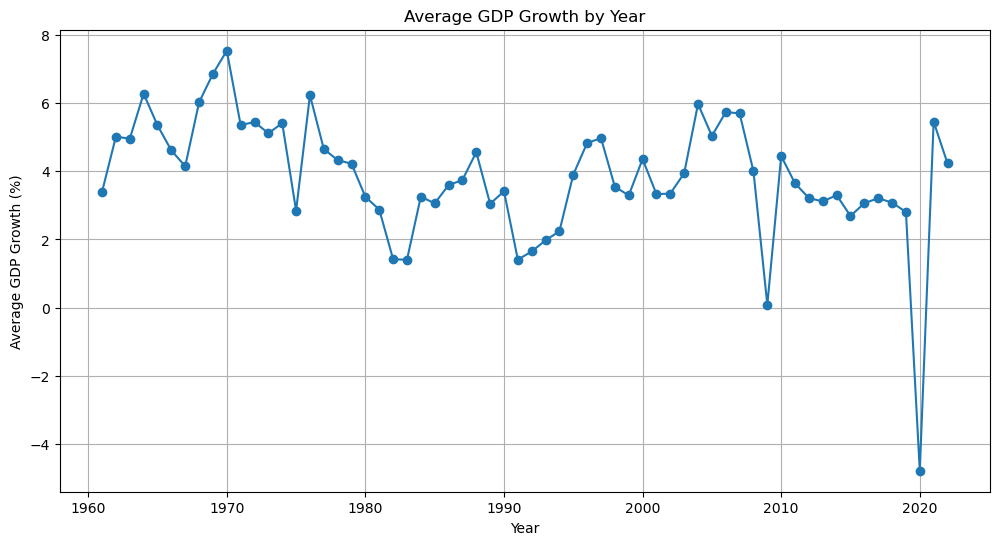

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(gdp_growth_trend['Year'], gdp_growth_trend['AvgGDPGrowth'], marker='o')
plt.title('Average GDP Growth by Year')
plt.xlabel('Year')
plt.ylabel('Average GDP Growth (%)')
plt.grid()
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_25328\79177677.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_education_expenditure,


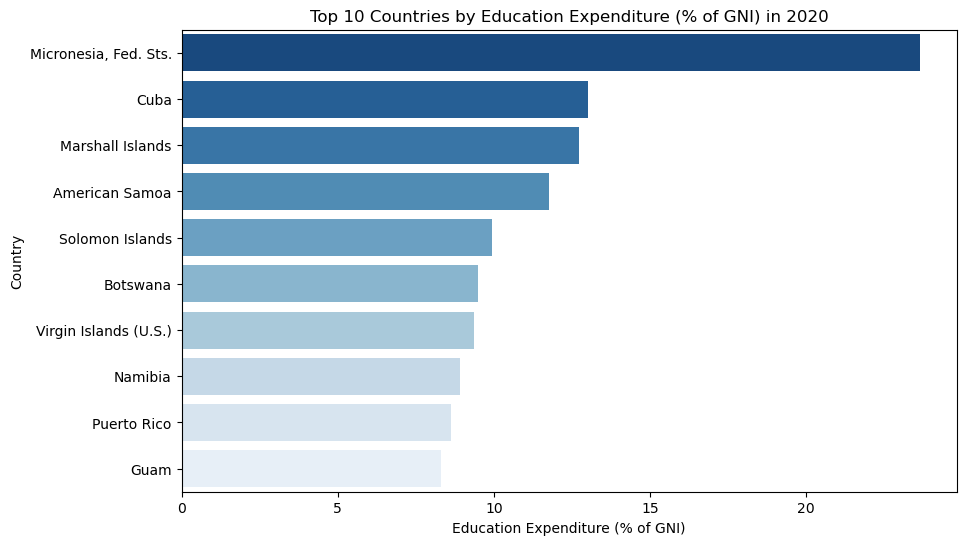

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_education_expenditure, 
            x='EducationExpenditure', 
            y='Country', 
            palette='Blues_r')
plt.title('Top 10 Countries by Education Expenditure (% of GNI) in 2020')
plt.xlabel('Education Expenditure (% of GNI)')
plt.ylabel('Country')
plt.show()

In [20]:
# Recreate necessary DataFrames
year = 2020

# Top GDP countries
query = f"""
SELECT "Country Name" AS CountryName, 
       "GDP per capita (current US$) [NY.GDP.PCAP.CD]" AS GDP_Per_Capita_USD
FROM {table_name}
WHERE "Time" = {year}
ORDER BY GDP_Per_Capita_USD DESC
LIMIT 10;
"""
top_gdp_countries = pd.read_sql_query(query, conn)

# Life Expectancy Trend
query = f"""
SELECT "Time" AS Year, 
       AVG("Life expectancy at birth, total (years) [SP.DYN.LE00.IN]") AS AvgLifeExpectancy
FROM {table_name}
GROUP BY "Time"
ORDER BY "Time";
"""
life_expectancy_trend = pd.read_sql_query(query, conn)

# Top Literacy Countries (assuming literacy data is available)
query = f"""
SELECT "Country Name" AS Country, 
       "Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]" AS LiteracyRate
FROM {table_name}
WHERE "Time" = {year}
ORDER BY LiteracyRate DESC
LIMIT 10;
"""
top_literacy_countries = pd.read_sql_query(query, conn)

# Population Growth
query = f"""
SELECT "Time" AS Year, 
       AVG("Population growth (annual %) [SP.POP.GROW]") AS AvgPopulationGrowth
FROM {table_name}
GROUP BY "Time"
ORDER BY "Time";
"""
population_growth = pd.read_sql_query(query, conn)

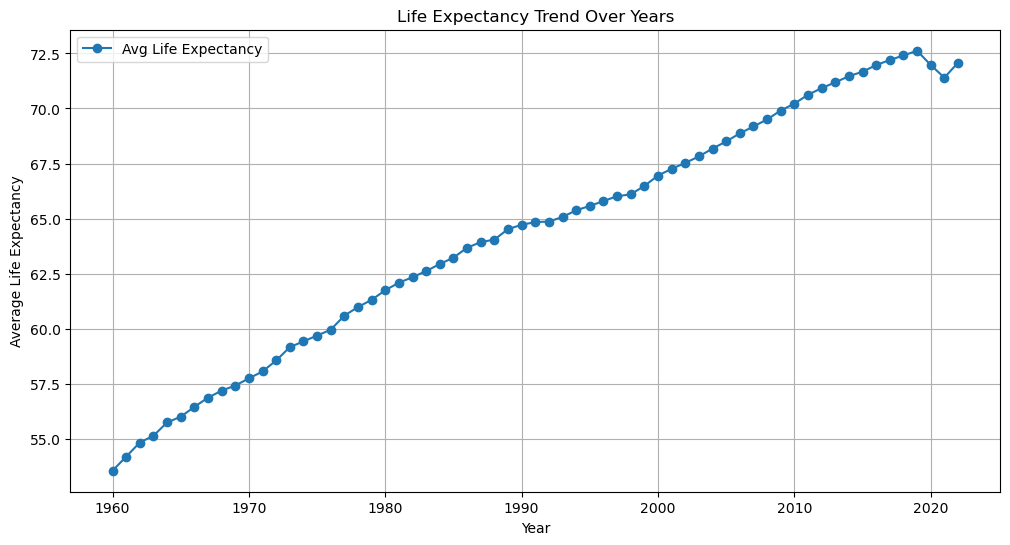

In [21]:
# Visualize Life Expectancy Trend
plt.figure(figsize=(12, 6))
plt.plot(life_expectancy_trend['Year'], life_expectancy_trend['AvgLifeExpectancy'], marker='o', label='Avg Life Expectancy')
plt.title('Life Expectancy Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.grid()
plt.legend()
plt.show()


### Step 5: Save the Output

In [22]:
# Save Key Outputs
try:
    if not top_gdp_countries.empty:
        top_gdp_countries.to_csv("top_gdp_countries.csv", index=False)
    if not life_expectancy_trend.empty:
        life_expectancy_trend.to_csv("life_expectancy_trend.csv", index=False)
    if not top_literacy_countries.empty:
        top_literacy_countries.to_csv("top_literacy_countries.csv", index=False)
    if not population_growth.empty:
        population_growth.to_csv("population_growth.csv", index=False)
    print("\nKey results saved to CSV files.")
except NameError as e:
    print(f"Error: One or more DataFrames are not defined. Details: {e}")
except Exception as e:
    print(f"An unexpected error occurred while saving files. Details: {e}")



Key results saved to CSV files.


In [23]:
# Add Output Validation

import os

# Check if the files were created successfully
files = ["top_gdp_countries.csv", "life_expectancy_trend.csv", "top_literacy_countries.csv", "population_growth.csv"]

for file in files:
    if os.path.exists(file):
        print(f"{file} saved successfully.")
    else:
        print(f"Error: {file} was not created.")


top_gdp_countries.csv saved successfully.
life_expectancy_trend.csv saved successfully.
top_literacy_countries.csv saved successfully.
population_growth.csv saved successfully.
